In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr

import sklearn
from sklearn import datasets,linear_model
from sklearn import preprocessing
#from sklearn.model_seletion import train_test_split


In [19]:
all_df = pd.read_csv("wdbc.csv",index_col=False)
all_df.head()

,ID,Diagnosis,radius_mean,texture_mean,oerimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,cibcavepoints_mean,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
all_df.drop("ID",axis=1,inplace=True)
all_df.head()

,Diagnosis,radius_mean,texture_mean,oerimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,cibcavepoints_mean,Unnamed: 10,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           569 non-null    object 
 1   radius_mean         569 non-null    float64
 2   texture_mean        569 non-null    float64
 3   oerimeter_mean      569 non-null    float64
 4   area_mean           569 non-null    float64
 5   smoothness_mean     569 non-null    float64
 6   compactness_mean    569 non-null    float64
 7   concavity_mean      569 non-null    float64
 8   cibcavepoints_mean  569 non-null    float64
 9   Unnamed: 10         569 non-null    float64
 10  Unnamed: 11         569 non-null    float64
 11  Unnamed: 12         569 non-null    float64
 12  Unnamed: 13         569 non-null    float64
 13  Unnamed: 14         569 non-null    float64
 14  Unnamed: 15         569 non-null    float64
 15  Unnamed: 16         569 non-null    float64
 16  Unnamed:

In [22]:
all_df.describe()

,radius_mean,texture_mean,oerimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,cibcavepoints_mean,Unnamed: 10,Unnamed: 11,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
all_df["Diagnosis"].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

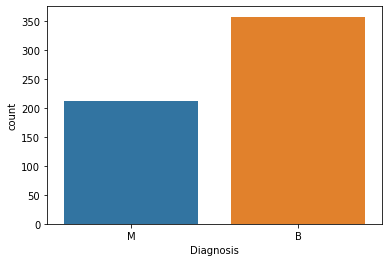

In [24]:
sns.countplot(x="Diagnosis",data=all_df)

radius_mean              AxesSubplot(0.125,0.799681;0.168478x0.0803191)
texture_mean          AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
oerimeter_mean        AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
area_mean             AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
smoothness_mean          AxesSubplot(0.125,0.703298;0.168478x0.0803191)
compactness_mean      AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
concavity_mean        AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
cibcavepoints_mean    AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
Unnamed: 10              AxesSubplot(0.125,0.606915;0.168478x0.0803191)
Unnamed: 11           AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
Unnamed: 12           AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
Unnamed: 13           AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
Unnamed: 14              AxesSubplot(0.125,0.510532;0.168478x0.0803191)
Unnamed: 15           AxesSubplot(0.327174,0.510532;0.168478x0.0

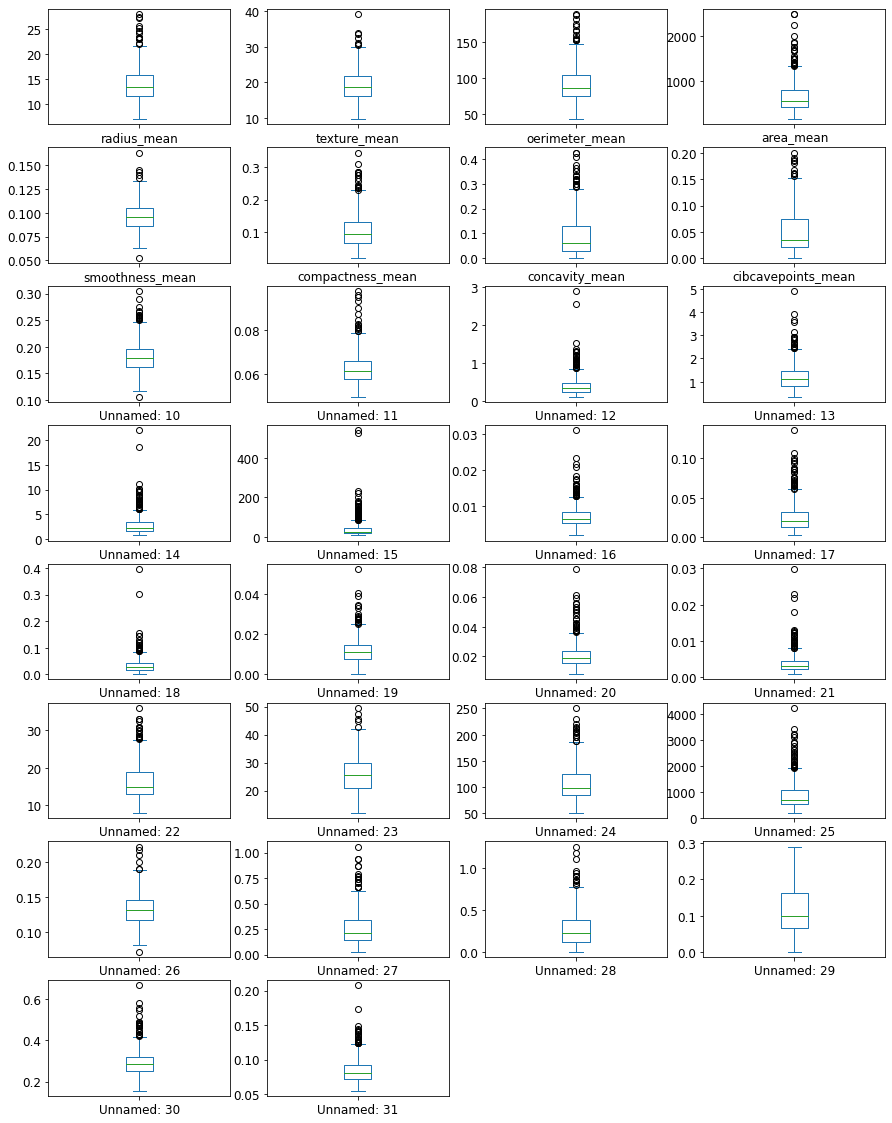

In [28]:
# use box plot to check the value range and outliners of each feature
data_mean = all_df.iloc[:, :]
data_mean.plot(kind='box',subplots=True,layout=(8,4),sharex=False,sharey=False,fontsize=12,figsize=(15,20))

<AxesSubplot:>

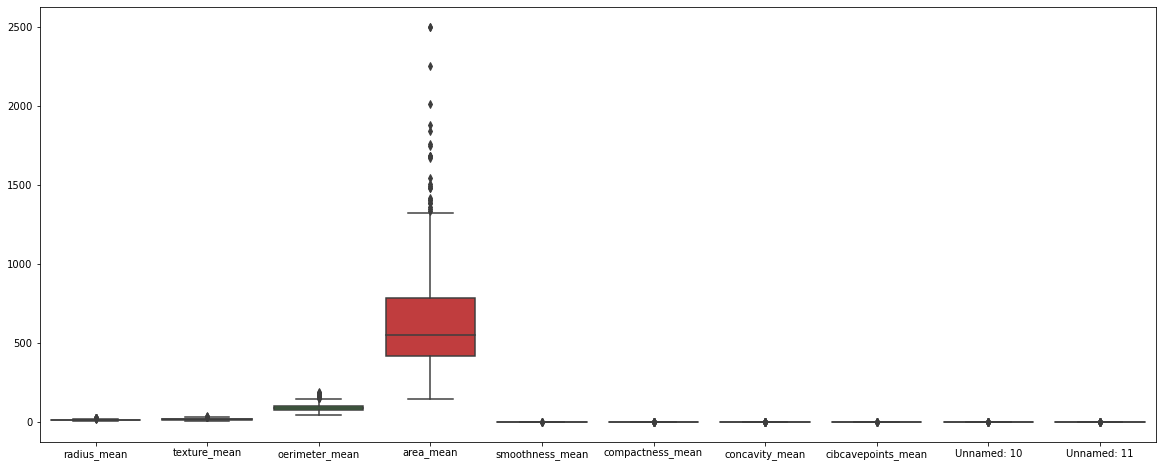

In [29]:
#compare the feartures data range
#only for the first 10 features , but try yourself to visualise more features
fig,ax = plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df.iloc[:, 1:11],ax=ax)

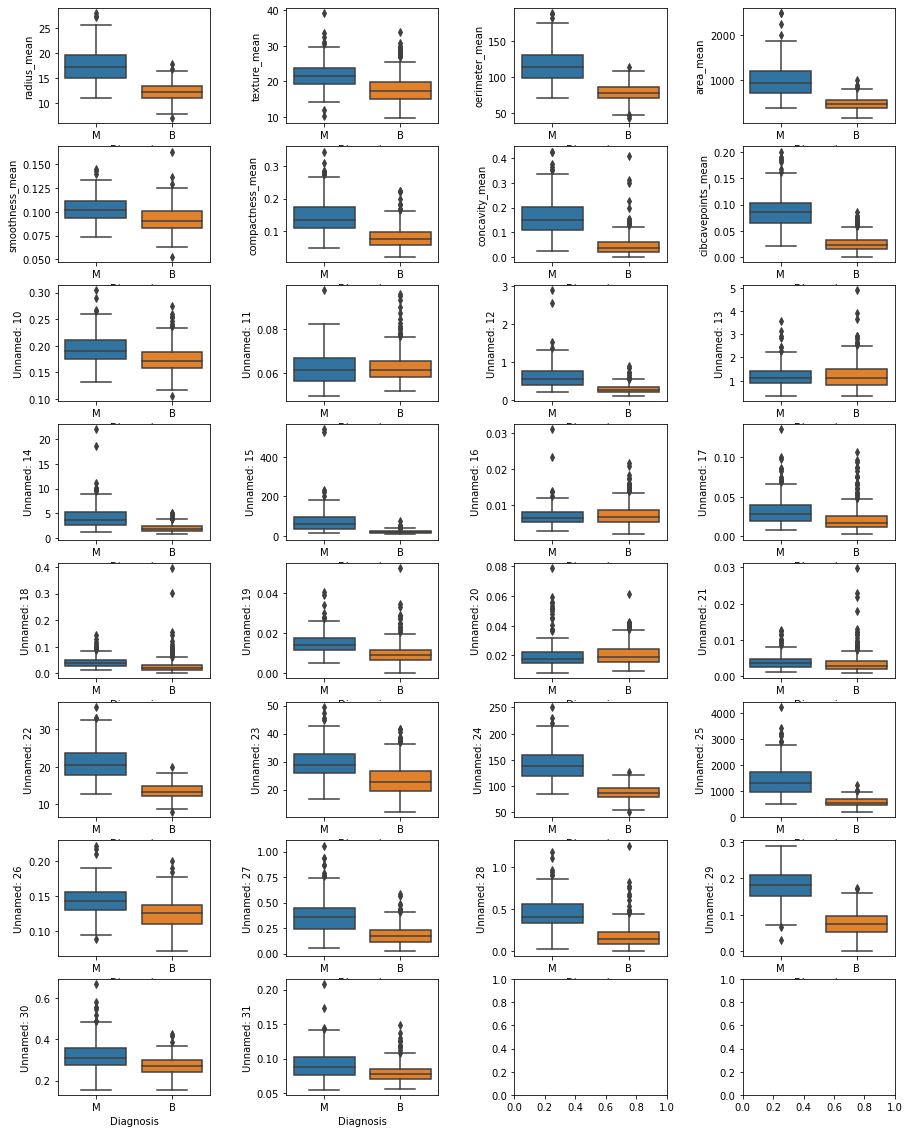

In [31]:
#use boxplots to see if certain feature can discriminate between beign and malignant 
fig,axes = plt.subplots(nrows=8,ncols=4,figsize=(15,20))
fig.subplots_adjust(hspace=.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(all_df.columns[1:]):
    _ = sns.boxplot(y=col, x='Diagnosis', data=all_df, ax=axes[i])

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

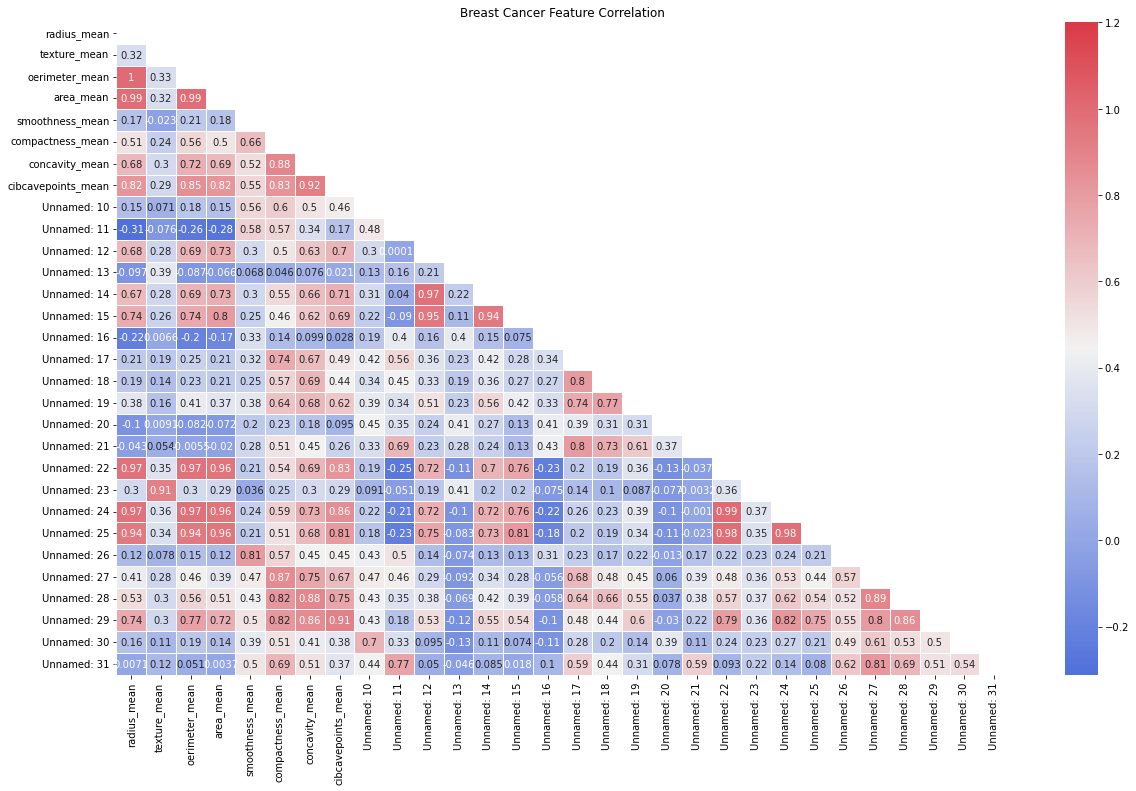

In [32]:
# compoute the correlation matrix to ovserve the correlations between pair of features

corrMatt = all_df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

# see up the matplotlib figure
fig, ax = plt.subplots(figsize = (20,12))
plt.title('Breast Cancer Feature Correlation')

# generate a custom diverging colormap
cmap = sns.diverging_palette(260,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1)

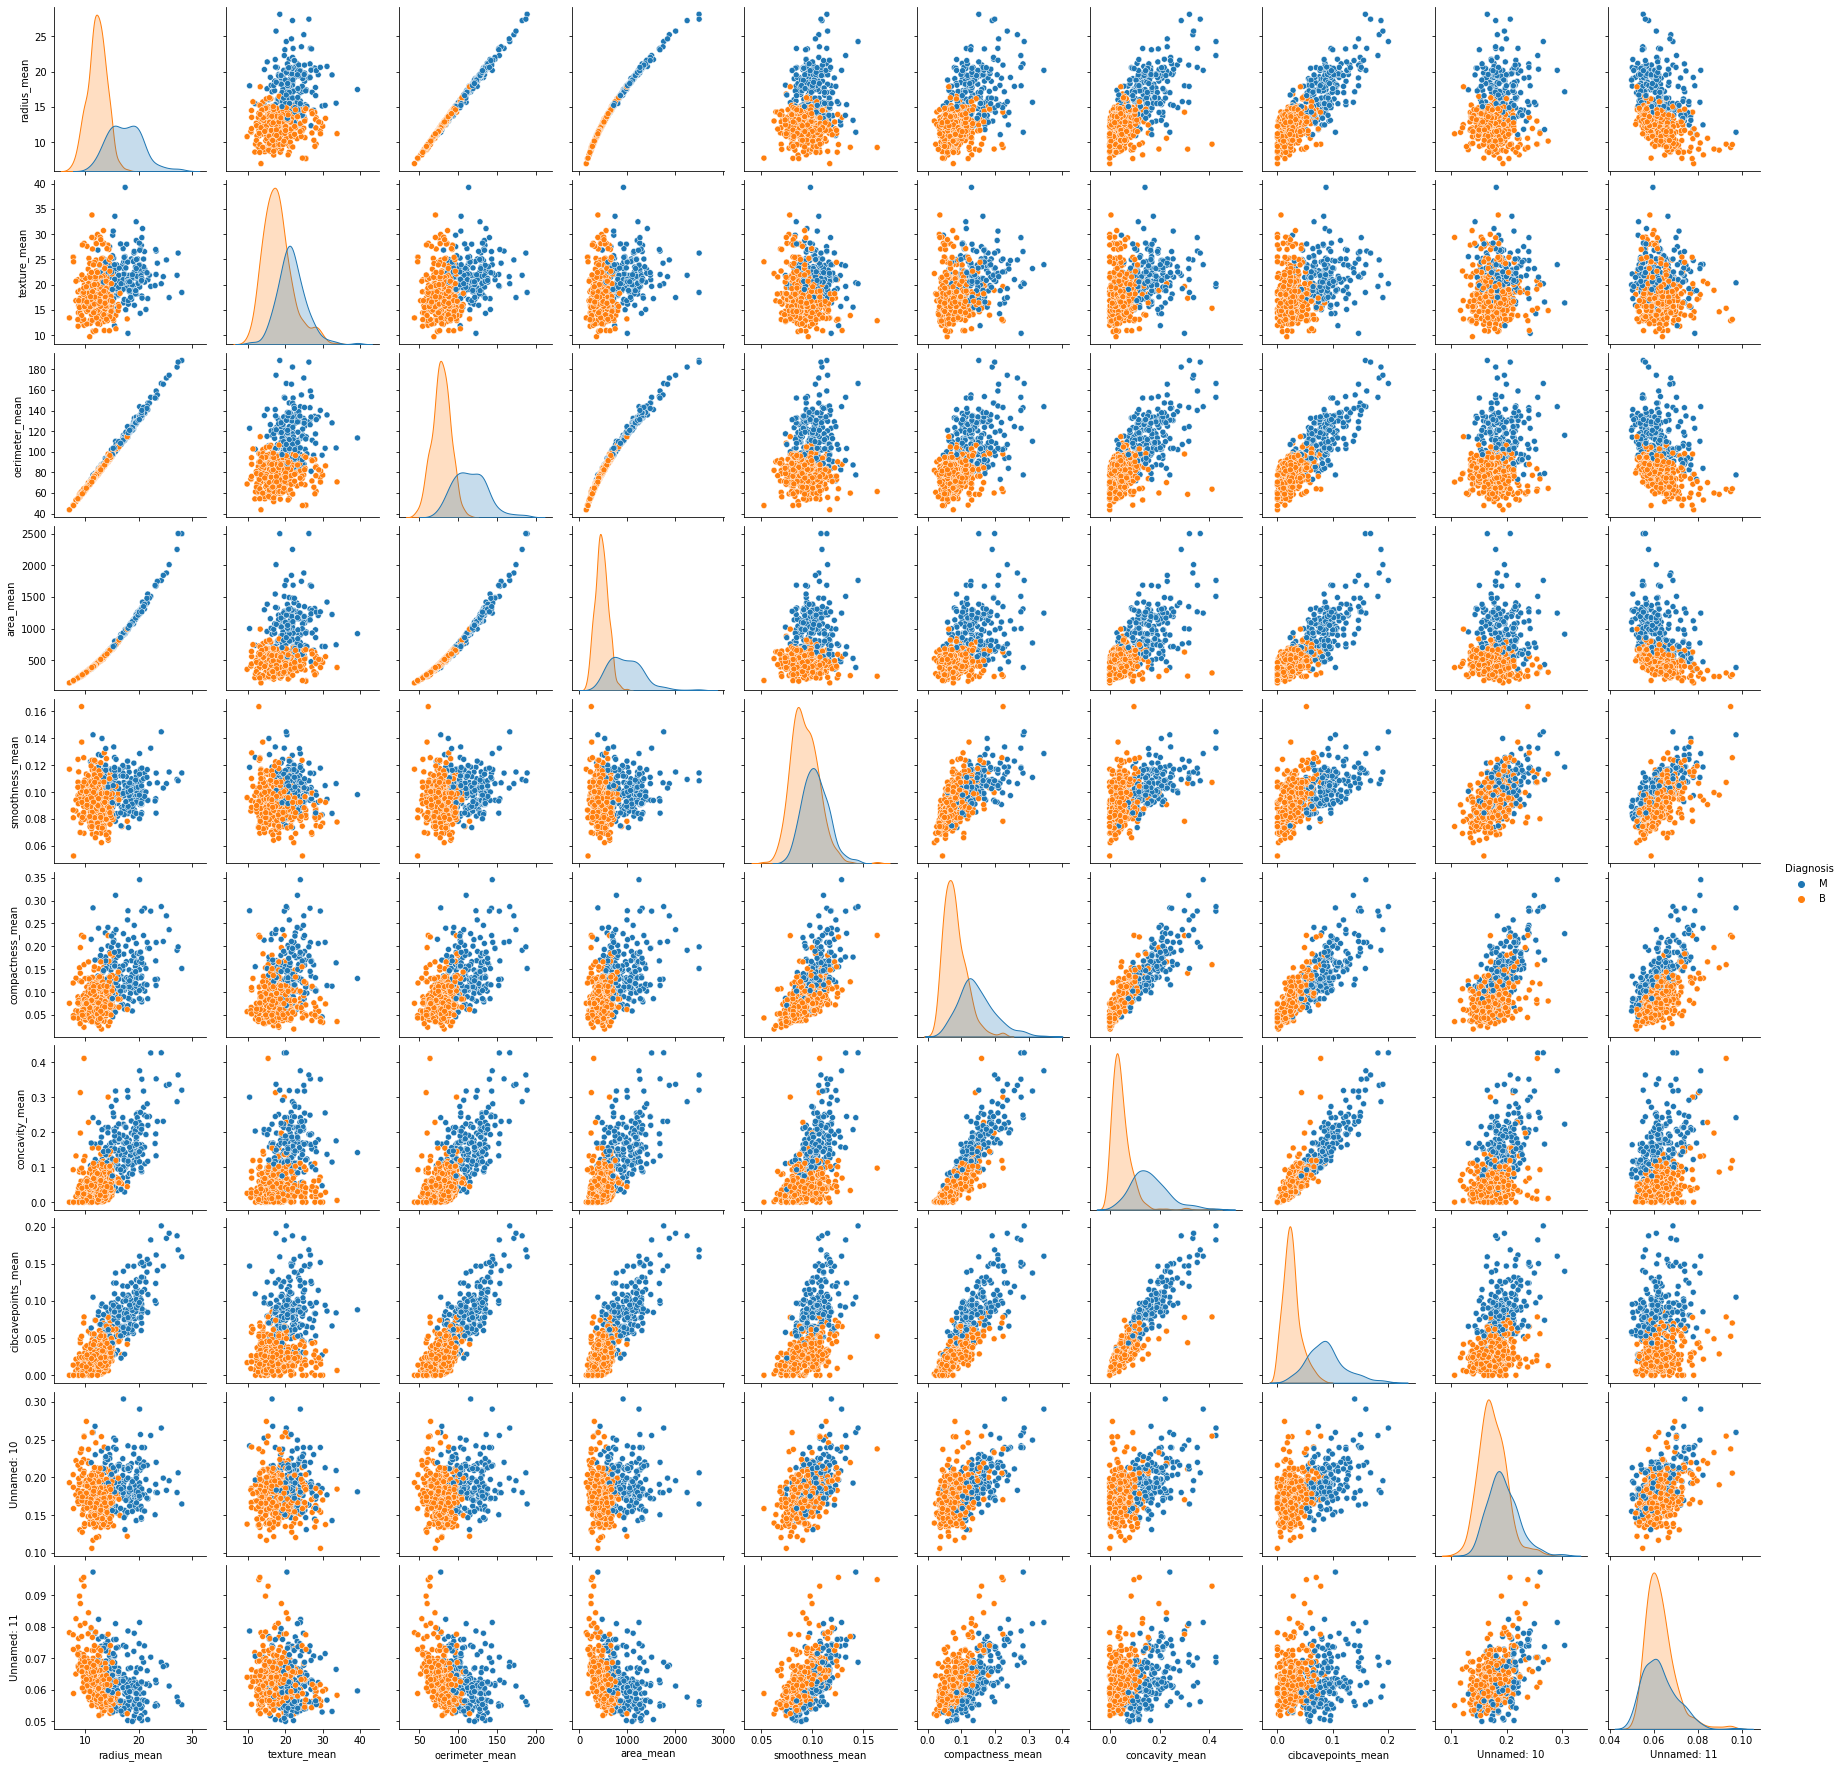

In [33]:
# scatter plots of the first 10 "means" features.
# you may try to plot the other features

sns.pairplot(all_df[list(all_df.columns[1:11]) + ['Diagnosis']], hue='Diagnosis');

In [2]:
# assign features to X
X = all_df.drop("Diagnosis", axis=1)

# Normalise the features to use zero mean normalisation
# only for the first 10 features , but try yourself to visual more features.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax = plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

NameError: name 'all_df' is not defined

In [1]:
# apply PAC for dimensionality reduction

from sklearn.decomposition import PCA

feature_names = list(X.columns)
print(feature_names)
pca = PCA(n_components=10)
Xs_pca = pca.fit_transform(Xs)

NameError: name 'X' is not defined

In [38]:
# only retain the first two modes of PCA as the new features
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = Xs_pca[:,0]
PCA_df['PCA_2'] = Xs_pca[:,1]

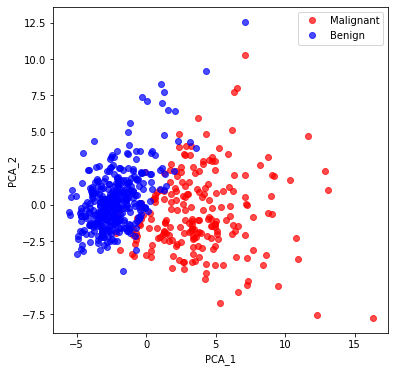

In [40]:
# visualise the Malignant and benign using the two PCA features

plt.figure(figsize = (6,6))
plt.plot(PCA_df['PCA_1'][all_df['Diagnosis'] == 'M'],PCA_df['PCA_2'][all_df['Diagnosis'] == 'M'],'ro',alpha=0.7,)
plt.plot(PCA_df['PCA_1'][all_df['Diagnosis'] == 'B'],PCA_df['PCA_2'][all_df['Diagnosis'] == 'B'],'bo',alpha=0.7)

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])


In [44]:
# First ,transform the class labels from their original string representation(M and B) into integers 1:M ; 0:B

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
all_df['Diagnosis'] = le.fit_transform(all_df['Diagnosis'])
all_df.head()

# assign numerical label to y
y = all_df['Diagnosis']

In [45]:
# Then stratify sampling . Divide data into training and testing sets.
# Pay attention that we are using the normalised data value Xs rather than X. You may try X/

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=1, stratify=y)

In [48]:
# use kernam SVM classifier to train a model based on 70% of the data

from sklearn.svm import SVC

clf= SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(Xs_train,y_train)

SVC(gamma='auto', probability=True)

In [47]:
# classify the test dataset and output the accuracy

classifier_score = clf.score(Xs_test,y_test)
print("the classifier accuracy score is {:03.2f}".format(classifier_score))

the classifier accuracy score is 0.95


In [50]:
# now let's try k-fold cross validation
# get average of 5-fold cross-validation score using on SVM classifier
# please try different number of folds and oberve the results.

from sklearn.model_selection import cross_val_score
n_folds = 10
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
cv_error = np.average(cross_val_score(clf_cv, Xs, y, cv=n_folds))
print("the {} -- fold cross-validation accuracy score for this classifier is {:.2f}".format(n_folds, cv_error))


the 10 -- fold cross-validation accuracy score for this classifier is 0.98


In [53]:
# now let's try classification with some selected features, not all the features
# with 3 features , the classification accuracy is already quite good ~ 95%
# try to include more features and observe

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# model with just 3 best features selected(k=3)

clf_fs_cv = Pipeline([
    ('feature_selector', SelectKBest(f_classif, k=3)),
    ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability= True))
])

scores = cross_val_score(clf_fs_cv, Xs, y, cv=5) #5 folds

print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: {%.2f +- %.3f}%%" %avg)

[0.93859649 0.95614035 0.96491228 0.94736842 0.94690265]
Average score and standard deviation: {95.08 +- 0.402}%


In [55]:
# we use function matrix (TP,TN,FP,FN) to cisualise the performance

from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.fit(Xs_train, y_train).predict(Xs_test)
cm = confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       107
           1       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



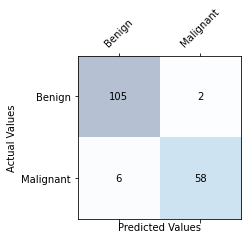

In [59]:
# plot confusion matrix

fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j],va='center',ha='center')
classes=['Benign','Malignant']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.xlabel("Predicted Values", )
plt.ylabel("Actual Values");
print(classification_report(y_test,y_pred))

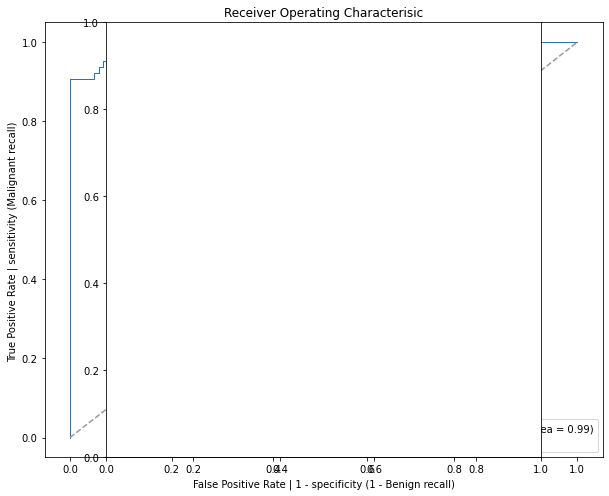

In [62]:
# plot the receiver operating characteristic curve (ROC).

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(Xs_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)'%(roc_auc))
plt.plot([0,1],[0,1],'--',color=(0.6,0.6,0.6),label='random')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate | 1 - specificity (1 - Benign recall)')
plt.ylabel('True Positive Rate | sensitivity (Malignant recall) ')
plt.title('Receiver Operating Characterisic')
plt.legend(loc='lower right')
plt.axes().set_aspect(1)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from tqdm import tqdm

models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

# test options and evaluation metric
num_folds = 5
num_instances = len(Xs_train)
scoring = 'accuracy'
results = []
names = []
for name, model in tqdm(models):
    kf = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, Xs, y, cv=kf, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)

print('5-fold cross-validation accuracy score for the training data for all the classifiers')
for name, cv_results in zip(names, results):
    print("%-10s:(%.6f)"%(name, cv_results.mean(), cv_results.std()))


  0%|          | 0/6 [00:00<?, ?it/s]Exception ignored in: <function tqdm.__del__ at 0x7fc3025c50e0>
Traceback (most recent call last):
  File "/Users/mengjiao/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/mengjiao/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'

100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

5-fold cross-validation accuracy score for the training data for all the classifiers


TypeError: not all arguments converted during string formatting

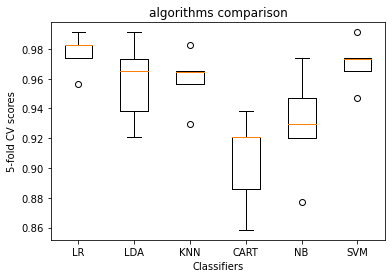

In [85]:
# compare the algorithms

plt.title('algorithms comparison')
plt.boxplot(results)
plt.xlabel('Classifiers')
plt.ylabel('5-fold CV scores')
plt.xticks(np.arange(len(names)) + 1, names);

It is oberved that for this application , a simple linear regression works better that nonlinear models/

here are some practice for you to try
1. observe the results if we don't normalise the feature value range
2. currently all the modelling methods(ie.SVM,KNN,LG, etc) used default parameter settings. check the related documents and try different settings to see if the performance can be improved.
3. check other feature selection methods and compare if the automatically selected features are consistent with the obervation using the correlation plots and box plots.